In [9]:
import tensorflow as tf
from tensorflow import keras
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [18]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [95]:
image_ds = tf.data.Dataset.list_files('../../ML_projects/sports_celebrities_classification/images_dataset/*/*', shuffle = True)

In [96]:
for file in image_ds.take(10):
    print(file.numpy())

b'../../ML_projects/sports_celebrities_classification/images_dataset/roger_federer/51f465e41dbadc549abdd64ba7ee166d.jpg'
b'../../ML_projects/sports_celebrities_classification/images_dataset/virat_kohli/7e224dbc5c.jpg'
b'../../ML_projects/sports_celebrities_classification/images_dataset/serena_williams/merlin_159161442_12e2102e-bd10-43d0-9b10-57d0dc248805-superJumbo.jpg'
b'../../ML_projects/sports_celebrities_classification/images_dataset/maria_sharapova/images.jfif'
b'../../ML_projects/sports_celebrities_classification/images_dataset/virat_kohli/a18f264208.jpg'
b'../../ML_projects/sports_celebrities_classification/images_dataset/roger_federer/NINTCHDBPICT000561000009-e1582196702724-1-1600x1412.jpg'
b'../../ML_projects/sports_celebrities_classification/images_dataset/maria_sharapova/001aa018f83f14d5a9cd30.jpg'
b'../../ML_projects/sports_celebrities_classification/images_dataset/virat_kohli/fa92cc3cd5.jpg'
b'../../ML_projects/sports_celebrities_classification/images_dataset/virat_kohli/a

2024-09-19 12:32:33.726054: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [365]
	 [[{{node Placeholder/_0}}]]
2024-09-19 12:32:33.726348: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [365]
	 [[{{node Placeholder/_0}}]]


In [102]:
size = len(image_ds)

In [103]:
train_ds = image_ds.take(int(size*0.8))
test_ds = image_ds.skip(int(size*0.8))

In [104]:
def get_label(file_path):
    return tf.strings.split(file_path, '/')[-2]

In [116]:
def process_image(file_path):
    label = get_label(file_path)
    img = tf.io.read_file(file_path)
    img = tf.image.decode_image(img)
    return img, label

In [112]:
for img, label in train_ds.map(process_image).take(3):d
    print("Image:", img)
    print("Label:", label)

2024-09-19 13:00:20.791036: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [365]
	 [[{{node Placeholder/_0}}]]
2024-09-19 13:00:20.791293: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [365]
	 [[{{node Placeholder/_0}}]]


Image: tf.Tensor(
[[[ 98  73  66]
  [ 96  71  64]
  [114  89  82]
  ...
  [198 175 167]
  [202 179 171]
  [206 183 175]]

 [[103  78  71]
  [103  78  71]
  [109  84  77]
  ...
  [210 187 179]
  [214 191 183]
  [217 194 186]]

 [[109  85  75]
  [113  89  79]
  [112  88  78]
  ...
  [214 194 187]
  [215 195 188]
  [215 195 188]]

 ...

 [[131 173  61]
  [128 170  58]
  [125 167  55]
  ...
  [133 172  63]
  [133 172  63]
  [140 179  70]]

 [[135 177  65]
  [131 173  61]
  [125 167  55]
  ...
  [130 169  60]
  [133 172  63]
  [140 179  70]]

 [[129 171  59]
  [129 171  59]
  [128 170  58]
  ...
  [129 168  59]
  [131 170  61]
  [133 172  63]]], shape=(2048, 1366, 3), dtype=uint8)
Label: tf.Tensor(b'lionel_messi', shape=(), dtype=string)
Image: tf.Tensor(
[[[ 58  62  61]
  [ 60  64  63]
  [ 65  67  66]
  ...
  [125 129 132]
  [125 129 132]
  [124 128 131]]

 [[ 60  64  63]
  [ 61  65  64]
  [ 66  68  67]
  ...
  [123 128 131]
  [123 128 131]
  [124 129 132]]

 [[ 62  66  65]
  [ 63  67  66]

In [117]:
dataset_train = test_ds.map(process_image)

In [120]:
dataset_train_filtered = dataset_train.filter(filter_single_faces)

AttributeError: in user code:

    File "/tmp/ipykernel_3970/1721882532.py", line 2, in filter_single_faces  *
        image = image.numpy().astype(np.uint8)

    AttributeError: 'Tensor' object has no attribute 'numpy'


In [111]:
face_cascade = cv2.CascadeClassifier('../../ML_projects/sports_celebrities_classification/opencv/haarcascades/haarcascade_frontalface_default.xml')
eyes_cascade = cv2.CascadeClassifier('../../ML_projects/sports_celebrities_classification/opencv/haarcascades/haarcascade_eye.xml')

(-0.5, 899.5, 599.5, -0.5)

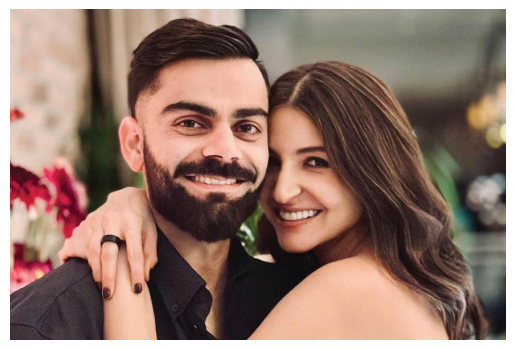

In [54]:
img_test = cv2.imread('../../ML_projects/sports_celebrities_classification/test_images/virat-kohli.jpg')
plt.imshow(cv2.cvtColor(img_test, cv2.COLOR_BGR2RGB))
plt.axis('off')

In [118]:
def filter_single_faces(image, label):
    image = image.numpy().astype(np.uint8)
    count_faces = 0
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(img_gray, scaleFactor=1.2, minNeighbors=5)
    if len(faces) == 0:
        return False
    for (x, y, w, h) in faces:
        roi_gray = img_gray[y:y+h, x:x+w]
        eyes = eyes_cascade.detectMultiScale(roi_gray)
        if len(eyes) > 0:
            count_faces+=1
    return count_faces == 1